In [9]:
import cv2
import cv2.dnn as dnn
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image = cv2.imread('images/dog.jpg')
scale = 1/255

In [11]:
width = image.shape[1]
height = image.shape[0]

In [12]:
def get_output_layers(net):    
    layer_names = net.getLayerNames()    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    # label = str(classes[class_id])
    # color = COLORS[class_id]
    # color = 'blue'
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), 1, 2)
    # cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [13]:
net = dnn.readNet('../darknet/darknet/cfg/yolov3.cfg', '../darknet/darknet/yolov3.weights')
blob = dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)
outs = net.forward(get_output_layers(net))

In [14]:
conf_threshold = 0.9
nms_threshold = 0.45

In [15]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = (center_x - w/2.0)
            y = (center_y - h/2.0)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [16]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
bboxes = []

test = image
for i in indices:
    i = i[0]
    box = boxes[i]
    x = round(box[0])
    y = round(box[1])
    w = box[2]
    h = box[3]

    draw_bounding_box(test, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    bboxes.append(image[y:y+h, x:w+x])

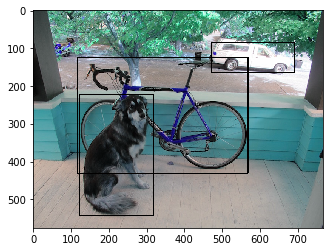

In [17]:
plt.imshow(test)

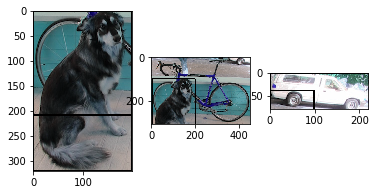

In [18]:
fig, axes = plt.subplots(1, len(bboxes))
for i in range(len(bboxes)):
    axes[i].imshow(bboxes[i])